In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [74]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('data/raw_data.csv')
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q9_2,Q9_3,Q9_4,Q9_5,Q10,Q11,Q12,Q13,Q14_1,Q15
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Attributes - Brand Reputation,Attributes - Health Benefit,Attributes - Caffeine Content,Attributes - Price,Platforms,Units,Purpose,MottoPrice,MottoLikelihood - Likelihood of Switching,MottoFlavor
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID29_2""}","{""ImportId"":""QID29_3""}","{""ImportId"":""QID29_10""}","{""ImportId"":""QID29_11""}","{""ImportId"":""QID30""}","{""ImportId"":""QID31""}","{""ImportId"":""QID32""}","{""ImportId"":""QID42_TEXT""}","{""ImportId"":""QID33_1""}","{""ImportId"":""QID34""}"
2,2023-04-15 13:21:28,2023-04-15 13:23:49,IP Address,174.196.202.163,100,141,True,2023-04-15 13:23:49,R_UEENeM2ghM5uKK5,NaN,...,4,5,3,0,In-Store Ads,Per Unit,Refreshment,4,7,Matcha
3,2023-04-15 13:24:16,2023-04-15 13:27:24,IP Address,107.77.225.125,100,187,True,2023-04-15 13:27:25,R_AzdTD7ACCdSVCTv,NaN,...,1,0,1,3,Word of Mouth,Bulk,Refreshment,0,0,Rooibos
4,2023-04-15 13:24:08,2023-04-15 13:28:14,IP Address,185.216.201.85,100,246,True,2023-04-15 13:28:15,R_2642Y0EiU2ABVzi,NaN,...,3,4,4,4,Word of Mouth,Per Unit,Refreshment,2,8,Matcha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2023-04-23 13:35:07,2023-04-23 13:36:37,IP Address,128.197.29.224,100,89,True,2023-04-23 13:36:37,R_3lQDroR045aAk6M,NaN,...,3,3,5,1,In-Store Ads,Per Unit,Energy Boost,$5,3,Matcha
105,2023-04-23 13:34:41,2023-04-23 13:36:56,IP Address,128.197.29.236,100,135,True,2023-04-23 13:36:56,R_3KPE06VqIEladT4,NaN,...,5,5,4,4,In-Store Ads,Per Unit,Refreshment,3,7,Matcha
106,2023-04-23 13:35:03,2023-04-23 13:37:12,IP Address,128.197.29.238,100,128,True,2023-04-23 13:37:13,R_3lyPQPa7kP0tEis,NaN,...,3,4,0,0,Word of Mouth,Per Unit,Refreshment,4,9,Matcha
107,2023-04-23 13:34:09,2023-04-23 13:37:58,IP Address,128.197.29.255,100,229,True,2023-04-23 13:37:59,R_3qD4xaOcxjG2EXM,NaN,...,5,4,4,4,Word of Mouth,Bulk,Refreshment,5,8,Matcha


In [4]:
df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5_1',
       'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5', 'Q5_6', 'Q5_7', 'Q5_8', 'Q6', 'Q7_1',
       'Q8', 'Q9_1', 'Q9_2', 'Q9_3', 'Q9_4', 'Q9_5', 'Q10', 'Q11', 'Q12',
       'Q13', 'Q14_1', 'Q15'],
      dtype='object')

In [5]:
df.drop(columns=['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage'], inplace=True)

In [6]:
df.head()

,ResponseId,Q1,Q2,Q3,Q4,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,...,Q9_2,Q9_3,Q9_4,Q9_5,Q10,Q11,Q12,Q13,Q14_1,Q15
0,Response ID,Gender,Age,Income,Exercise,BeverageTypePreference - Coffee,BeverageTypePreference - Tea,BeverageTypePreference - Soda,BeverageTypePreference - Milk,BeverageTypePreference - Juice,...,Attributes - Brand Reputation,Attributes - Health Benefit,Attributes - Caffeine Content,Attributes - Price,Platforms,Units,Purpose,MottoPrice,MottoLikelihood - Likelihood of Switching,MottoFlavor
1,"{""ImportId"":""_recordId""}","{""ImportId"":""QID20""}","{""ImportId"":""QID21_TEXT""}","{""ImportId"":""QID23""}","{""ImportId"":""QID24""}","{""ImportId"":""QID25_4""}","{""ImportId"":""QID25_5""}","{""ImportId"":""QID25_6""}","{""ImportId"":""QID25_7""}","{""ImportId"":""QID25_8""}",...,"{""ImportId"":""QID29_2""}","{""ImportId"":""QID29_3""}","{""ImportId"":""QID29_10""}","{""ImportId"":""QID29_11""}","{""ImportId"":""QID30""}","{""ImportId"":""QID31""}","{""ImportId"":""QID32""}","{""ImportId"":""QID42_TEXT""}","{""ImportId"":""QID33_1""}","{""ImportId"":""QID34""}"
2,R_UEENeM2ghM5uKK5,Male,24,"> $150,000 USD",4-6,4,5,1,1,2,...,4,5,3,0,In-Store Ads,Per Unit,Refreshment,4,7,Matcha
3,R_AzdTD7ACCdSVCTv,Male,23,"$50,000 to $100,000 USD",1-3,2,1,5,3,4,...,1,0,1,3,Word of Mouth,Bulk,Refreshment,0,0,Rooibos
4,R_2642Y0EiU2ABVzi,Male,24,"$100,000 to $150,000 USD",1-3,2,3,4,1,4,...,3,4,4,4,Word of Mouth,Per Unit,Refreshment,2,8,Matcha


In [7]:
columns_name = ['ID', 'Gender', 'Age', 'Income', 'Exercise', 'Coffee',
                'Tea', 'Soda', 'Milk', 'Juice', 'EnergyDrink', 'SparklingWater',
                'Alcohol', 'Purchase_Location', 'Ingredients_Quality', 'Consumption',
                'Taste', 'Brand_Reputation', 'Health_Benefit', 'Caffeine_Content', 'Price',
                'Platforms', 'Units', 'Purpose', 'Motto_Price', 'Motto_Likelihood', 'Motto_Flavor']

In [71]:
columns_name.__len__()

27

In [75]:
df.columns = columns_name
df.head()

,ID,Gender,Age,Income,Exercise,Coffee,Tea,Soda,Milk,Juice,EnergyDrink,SparklingWater,Alcohol,Purchase_Location,Ingredients_Quality,Consumption,Taste,Brand_Reputation,Health_Benefit,Caffeine_Content,Price,Platforms,Units,Purpose,Motto_Price,Motto_Likelihood,Motto_Flavor
2,R_UEENeM2ghM5uKK5,Male,24,">150,000",4-6,4,5,1,1,2,1,5,1,Convenience Stores,5,2,4,4,5,3,0,In-Store Ads,Per Unit,Refreshment,4.0,7,Matcha
3,R_AzdTD7ACCdSVCTv,Male,23,"50,000-100,000",1-3,2,1,5,3,4,2,2,2,Restaurants/Cafes,4,1,5,1,0,1,3,Word of Mouth,Bulk,Refreshment,0.0,0,Rooibos
4,R_2642Y0EiU2ABVzi,Male,24,"100,000-150,000",1-3,2,3,4,1,4,3,3,3,Restaurants/Cafes,3,0,4,3,4,4,4,Word of Mouth,Per Unit,Refreshment,2.0,8,Matcha
5,R_1ONMulo6dpFaq04,Male,26,"<50,000",0,2,4,1,5,2,5,5,5,Online,4,2,4,1,5,5,1,Instagram,Per Unit,Increased Focus,6.0,7,Matcha
6,R_1lo8HoT9csBWOxP,Female,24,"100,000-150,000",1-3,2,3,1,2,3,1,5,5,Convenience Stores,5,1,4,1,5,5,3,Word of Mouth,Per Unit,Increased Focus,6.5,7,Matcha


In [9]:
df.drop([0,1], inplace=True)

In [10]:
df.shape

(107, 27)

---
Null Values

In [11]:
df.isnull().sum()

ID                     0
Gender                 0
Age                    0
Income                 0
Exercise               0
Coffee                 2
Tea                    2
Soda                   2
Milk                   2
Juice                  2
EnergyDrink            2
SparklingWater         2
Alcohol                2
Purchase_Location      2
Ingredients_Quality    2
Consumption            2
Taste                  2
Brand_Reputation       2
Health_Benefit         2
Caffeine_Content       2
Price                  2
Platforms              2
Units                  2
Purpose                2
Motto_Price            2
Motto_Likelihood       2
Motto_Flavor           2
dtype: int64

In [12]:
df.loc[df.Coffee.isnull()]

,ID,Gender,Age,Income,Exercise,Coffee,Tea,Soda,Milk,Juice,...,Brand_Reputation,Health_Benefit,Caffeine_Content,Price,Platforms,Units,Purpose,Motto_Price,Motto_Likelihood,Motto_Flavor
10,R_31HL3P6iG2OqdZg,Female,19,"$100,000 to $150,000 USD",1-3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,R_9FTkVJ1U2W3760N,Non-Binary,19,"$50,000 to $100,000 USD",1-3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.loc[df.Motto_Flavor.isnull()]

,ID,Gender,Age,Income,Exercise,Coffee,Tea,Soda,Milk,Juice,...,Brand_Reputation,Health_Benefit,Caffeine_Content,Price,Platforms,Units,Purpose,Motto_Price,Motto_Likelihood,Motto_Flavor
10,R_31HL3P6iG2OqdZg,Female,19,"$100,000 to $150,000 USD",1-3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,R_9FTkVJ1U2W3760N,Non-Binary,19,"$50,000 to $100,000 USD",1-3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Drop two rows with null values

df.dropna(inplace=True)

In [15]:
df.isnull().sum().sum()

0

In [73]:
df.duplicated().sum()

0

---

Gender

In [16]:
df.Gender.value_counts()

Female                  59
Male                    43
Non-Binary               2
Prefer Not to Answer     1
Name: Gender, dtype: int64

In [17]:
df.loc[df.Gender.isin(['Non-Binary', 'Prefer Not to Answer'])]

,ID,Gender,Age,Income,Exercise,Coffee,Tea,Soda,Milk,Juice,...,Brand_Reputation,Health_Benefit,Caffeine_Content,Price,Platforms,Units,Purpose,Motto_Price,Motto_Likelihood,Motto_Flavor
23,R_3iQHG3iy8UgvtNn,Prefer Not to Answer,22,"$50,000 to $100,000 USD",1-3,4,5,2,2,3,...,4,4,1,4,Word of Mouth,Per Unit,Refreshment,7,7,Matcha
73,R_1rOk2qfmLT4Fiji,Non-Binary,18,"> $150,000 USD",0,1,1,5,1,5,...,4,4,4,4,Word of Mouth,Bulk,Increased Focus,12,10,Matcha
103,R_3EXf8i9JI7ovBVN,Non-Binary,19,"> $150,000 USD",4-6,3,4,2,4,4,...,4,3,1,5,Word of Mouth,Per Unit,Refreshment,3,9,Matcha


In [18]:
df.drop([23,73,103], inplace=True)

In [19]:
df.Gender.value_counts()

Female    59
Male      43
Name: Gender, dtype: int64

---

Age

In [20]:
df.Age = df.Age.astype(int)

In [21]:
df.Age.value_counts().sort_index()

16     1
17     1
18    10
19    19
20    29
21    16
22     7
23     5
24     5
25     2
26     3
29     2
31     1
38     1
Name: Age, dtype: int64

---

Income

In [22]:
df.Income.value_counts().sort_index()

$100,000 to $150,000 USD    17
$50,000 to $100,000 USD     27
< $50,000 USD               32
> $150,000 USD              26
Name: Income, dtype: int64

In [23]:
df.Income = df.Income.map(lambda x : '100,000-150,000' if x=="$100,000 to $150,000 USD"
                  else ('50,000-100,000' if x=='$50,000 to $100,000 USD'
                  else ('<50,000' if x=='< $50,000 USD'
                  else ('>150,000' if x=='> $150,000 USD'
                  else x
                  )))).astype(str)

In [24]:
df.Income.value_counts().sort_index()

100,000-150,000    17
50,000-100,000     27
<50,000            32
>150,000           26
Name: Income, dtype: int64

---
Exercise

In [25]:
df.Exercise.value_counts().sort_index()

0      16
1-3    52
4-6    32
7+      2
Name: Exercise, dtype: int64

---

Preference

In [26]:
df.Coffee = df.Coffee.astype(int)
df.Tea = df.Tea.astype(int)
df.Soda = df.Soda.astype(int)
df.Milk = df.Milk.astype(int)
df.Juice = df.Juice.astype(int)
df.EnergyDrink = df.EnergyDrink.astype(int)
df.SparklingWater = df.SparklingWater.astype(int)
df.Alcohol = df.Alcohol.astype(int)


In [27]:
df.Coffee.value_counts().sort_index()

1    21
2    19
3     8
4    23
5    31
Name: Coffee, dtype: int64

In [28]:
df.Tea.value_counts().sort_index()

1    13
2    12
3    21
4    42
5    14
Name: Tea, dtype: int64

In [29]:
df.Soda.value_counts().sort_index()

1    28
2    24
3    24
4    17
5     9
Name: Soda, dtype: int64

In [30]:
df.Milk.value_counts().sort_index()

1    30
2    30
3    24
4     9
5     9
Name: Milk, dtype: int64

In [31]:
df.Juice.value_counts().sort_index()

1    10
2    19
3    26
4    26
5    21
Name: Juice, dtype: int64

In [32]:
df.EnergyDrink.value_counts().sort_index()

1    40
2    25
3    13
4    18
5     6
Name: EnergyDrink, dtype: int64

In [33]:
df.SparklingWater.value_counts().sort_index()

1    37
2    22
3    24
4     8
5    11
Name: SparklingWater, dtype: int64

In [34]:
df.Alcohol.value_counts().sort_index()

1    21
2    24
3    28
4    15
5    14
Name: Alcohol, dtype: int64

---

Purchase Location

In [35]:
df.Purchase_Location.value_counts().sort_index()

Convenience Stores    58
Online                 5
Restaurants/Cafes     21
Supermarkets          18
Name: Purchase_Location, dtype: int64

---

Ingredients Quality

In [36]:
df.Ingredients_Quality = df.Ingredients_Quality.astype(int)

In [37]:
df.Ingredients_Quality.value_counts().sort_index()

0     5
1    18
3    27
4    36
5    16
Name: Ingredients_Quality, dtype: int64

---

Daily Consumption

In [38]:
df.Consumption.value_counts().sort_index()

0          8
0.16       1
1         30
1-2        3
1.5 oz     1
10         1
2         31
2-3        2
3         17
4          4
5          3
6          1
Name: Consumption, dtype: int64

In [39]:
df.Consumption = df.Consumption.map(lambda x : '0' if ((x=='0.16') or (x=='1.5 oz')) else ('2' if x=='1-2' else ('3' if x=='2-3' else x))).astype(int)

In [40]:
df.Consumption.value_counts().sort_index()

0     10
1     30
2     34
3     19
4      4
5      3
6      1
10     1
Name: Consumption, dtype: int64

---

Attributes

In [41]:
df.Taste = df.Taste.astype(int)
df.Brand_Reputation = df.Brand_Reputation.astype(int)
df.Health_Benefit = df.Health_Benefit.astype(int)
df.Caffeine_Content = df.Caffeine_Content.astype(int)
df.Price = df.Price.astype(int)

In [42]:
df.Taste.value_counts().sort_index()

1     1
3     9
4    29
5    63
Name: Taste, dtype: int64

In [43]:
df.Brand_Reputation.value_counts().sort_index()

0     7
1    33
3    39
4    18
5     5
Name: Brand_Reputation, dtype: int64

In [44]:
df.Health_Benefit.value_counts().sort_index()

0     4
1    19
3    25
4    36
5    18
Name: Health_Benefit, dtype: int64

In [45]:
df.Caffeine_Content.value_counts().sort_index()

0    15
1    11
3    32
4    29
5    15
Name: Caffeine_Content, dtype: int64

In [46]:
df.Price.value_counts().sort_index()

0     4
1    16
3    27
4    38
5    17
Name: Price, dtype: int64

---

Platforms

In [47]:
df.Platforms.value_counts().sort_index()

In-Store Ads     12
Instagram        13
TikTok           13
Web Ads           2
Word of Mouth    62
Name: Platforms, dtype: int64

---

Units

In [48]:
df.Units.value_counts().sort_index()

Bulk        25
Per Unit    77
Name: Units, dtype: int64

---
Purpose

In [49]:
df.Purpose.value_counts().sort_index()

Alcohol Subsitute      1
Dining Compliments    10
Energy Boost          21
Increased Focus       16
Refreshment           54
Name: Purpose, dtype: int64

---

Motto Price

In [50]:
df.Motto_Price.value_counts().sort_index()

$1.5                   1
$2                     3
$2.5                   1
$3                     1
$4                     3
$5                     1
0                      2
1                      5
1.2                    1
1.75                   1
12                     1
2                     11
2 U84-89-0308          1
2.45                   1
2.5                    4
2.50                   1
2.75                   1
3                     20
3.5                    5
3.50                   4
4                     17
5                     10
5.7                    1
5?                     1
6                      1
6.3                    1
6.5                    1
7                      1
I don’t drink soda     1
Name: Motto_Price, dtype: int64

In [51]:
df.Motto_Price = df.Motto_Price.map(lambda x : '0' if x=="I don’t drink soda"
                  else ('5' if x=='5?'
                  else ('2' if x=='2 U84-89-0308'
                  else ('1.5' if x=='$1.5'
                  else ('2' if x=='$2'
                  else ('2.5' if x=='$2.5'
                  else ('3' if x=='$3'
                  else ('4' if x=='$4'
                  else ('5' if x=='$5'
                  else x
                  ))))))))).astype(float)

In [52]:
df.Motto_Price.value_counts().sort_index()

0.00      3
1.00      5
1.20      1
1.50      1
1.75      1
2.00     15
2.45      1
2.50      6
2.75      1
3.00     21
3.50      9
4.00     20
5.00     12
5.70      1
6.00      1
6.30      1
6.50      1
7.00      1
12.00     1
Name: Motto_Price, dtype: int64

---

Motto Likelihood

In [53]:
df.Motto_Likelihood.value_counts().sort_index()

0      4
1      2
10     7
2      7
3     10
4      3
5     13
6     10
7     24
8     18
9      4
Name: Motto_Likelihood, dtype: int64

In [54]:
df.Motto_Likelihood = df.Motto_Likelihood.astype(int)

In [55]:
df.Motto_Likelihood.value_counts().sort_index()

0      4
1      2
2      7
3     10
4      3
5     13
6     10
7     24
8     18
9      4
10     7
Name: Motto_Likelihood, dtype: int64

---

Motto Flavor

In [56]:
df.Motto_Flavor.value_counts().sort_index()

Matcha     71
Rooibos    31
Name: Motto_Flavor, dtype: int64

---

INFO

In [57]:
df.columns

Index(['ID', 'Gender', 'Age', 'Income', 'Exercise', 'Coffee', 'Tea', 'Soda',
       'Milk', 'Juice', 'EnergyDrink', 'SparklingWater', 'Alcohol',
       'Purchase_Location', 'Ingredients_Quality', 'Consumption', 'Taste',
       'Brand_Reputation', 'Health_Benefit', 'Caffeine_Content', 'Price',
       'Platforms', 'Units', 'Purpose', 'Motto_Price', 'Motto_Likelihood',
       'Motto_Flavor'],
      dtype='object')

In [58]:
df[['ID', 'Gender', 'Age', 'Income', 'Exercise', 'Coffee', 'Tea', 'Soda',
       'Milk', 'Juice', 'EnergyDrink', 'SparklingWater', 'Alcohol',
       'Purchase_Location', 'Ingredients_Quality', 'Consumption', 'Taste',
       'Brand_Reputation', 'Health_Benefit', 'Caffeine_Content']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 2 to 108
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   102 non-null    object
 1   Gender               102 non-null    object
 2   Age                  102 non-null    int64 
 3   Income               102 non-null    object
 4   Exercise             102 non-null    object
 5   Coffee               102 non-null    int64 
 6   Tea                  102 non-null    int64 
 7   Soda                 102 non-null    int64 
 8   Milk                 102 non-null    int64 
 9   Juice                102 non-null    int64 
 10  EnergyDrink          102 non-null    int64 
 11  SparklingWater       102 non-null    int64 
 12  Alcohol              102 non-null    int64 
 13  Purchase_Location    102 non-null    object
 14  Ingredients_Quality  102 non-null    int64 
 15  Consumption          102 non-null    int64 
 16  Taste   

In [59]:
df[['Price', 'Platforms', 'Units', 'Purpose', 'Motto_Price', 'Motto_Likelihood', 'Motto_Flavor']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 2 to 108
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             102 non-null    int64  
 1   Platforms         102 non-null    object 
 2   Units             102 non-null    object 
 3   Purpose           102 non-null    object 
 4   Motto_Price       102 non-null    float64
 5   Motto_Likelihood  102 non-null    int64  
 6   Motto_Flavor      102 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.4+ KB


---

To CSV

In [60]:
df

,ID,Gender,Age,Income,Exercise,Coffee,Tea,Soda,Milk,Juice,...,Brand_Reputation,Health_Benefit,Caffeine_Content,Price,Platforms,Units,Purpose,Motto_Price,Motto_Likelihood,Motto_Flavor
2,R_UEENeM2ghM5uKK5,Male,24,">150,000",4-6,4,5,1,1,2,...,4,5,3,0,In-Store Ads,Per Unit,Refreshment,4.0,7,Matcha
3,R_AzdTD7ACCdSVCTv,Male,23,"50,000-100,000",1-3,2,1,5,3,4,...,1,0,1,3,Word of Mouth,Bulk,Refreshment,0.0,0,Rooibos
4,R_2642Y0EiU2ABVzi,Male,24,"100,000-150,000",1-3,2,3,4,1,4,...,3,4,4,4,Word of Mouth,Per Unit,Refreshment,2.0,8,Matcha
5,R_1ONMulo6dpFaq04,Male,26,"<50,000",0,2,4,1,5,2,...,1,5,5,1,Instagram,Per Unit,Increased Focus,6.0,7,Matcha
6,R_1lo8HoT9csBWOxP,Female,24,"100,000-150,000",1-3,2,3,1,2,3,...,1,5,5,3,Word of Mouth,Per Unit,Increased Focus,6.5,7,Matcha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,R_3lQDroR045aAk6M,Female,23,">150,000",4-6,4,3,3,2,2,...,3,3,5,1,In-Store Ads,Per Unit,Energy Boost,5.0,3,Matcha
105,R_3KPE06VqIEladT4,Female,19,"50,000-100,000",1-3,4,5,2,4,4,...,5,5,4,4,In-Store Ads,Per Unit,Refreshment,3.0,7,Matcha
106,R_3lyPQPa7kP0tEis,Female,21,">150,000",0,1,4,2,1,3,...,3,4,0,0,Word of Mouth,Per Unit,Refreshment,4.0,9,Matcha
107,R_3qD4xaOcxjG2EXM,Male,21,"50,000-100,000",1-3,4,2,3,4,5,...,5,4,4,4,Word of Mouth,Bulk,Refreshment,5.0,8,Matcha


In [61]:
df.to_csv('data/cleaned_data.csv', encoding=None)

    Motto_Likelihood
0           0.039216
1           0.019608
2           0.068627
3           0.098039
4           0.029412
5           0.127451
6           0.098039
7           0.235294
8           0.176471
9           0.039216
10          0.068627


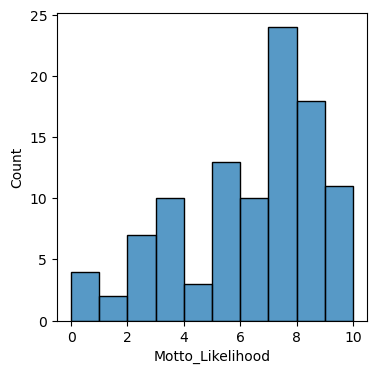

In [70]:
print(pd.DataFrame(df.Motto_Likelihood.value_counts(normalize=True).sort_index()))

plt.figure(figsize=(4,4))
sns.histplot(df.Motto_Likelihood, bins=10)
plt.show()

<AxesSubplot:xlabel='Motto_Likelihood', ylabel='Count'>

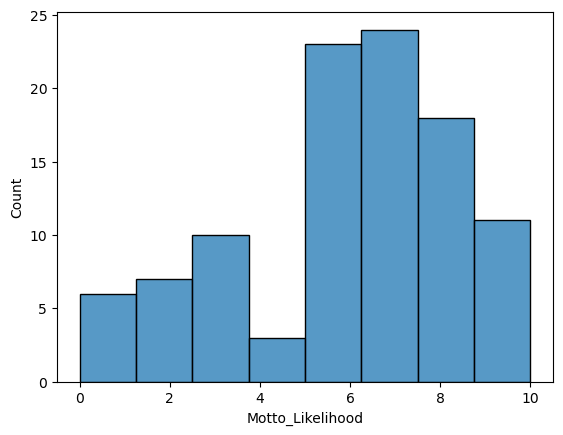

In [65]:
sns.histplot(df.Motto_Likelihood)